In [82]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

In [83]:
basee = ''
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + 'prog__0001_001.nc')
    return prog
def open_IC(label):
    base = basee 
    IC = xr.open_dataset(base + 'ISOMIP_IC.nc')
    return IC


In [84]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_IC(label)
    depth = grid.interp(prog.e,"x").fillna(0)
    lon = ocean_static.geolonb
    dataplot = variable.fillna(0)

    xx = lon
    if (varname == "uo") or (varname == "PFu") or (varname == "visc_rem_u"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


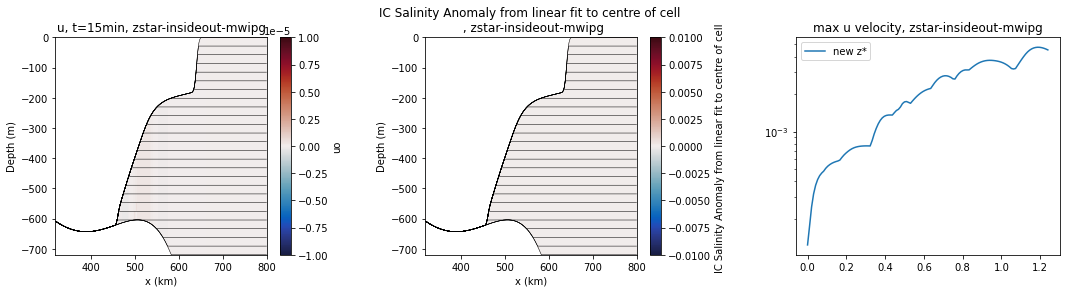

In [85]:
label = 'zstar-insideout-mwipg'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
axes[0].set_title('u, t=15min, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4, prog.u.max(['xq','yh','zl']).values, label = 'new z*')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()



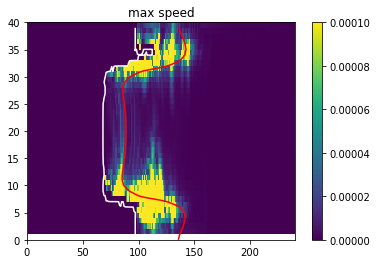

In [93]:
plt.pcolormesh(np.max((np.sqrt(prog.u.isel(Time = -1).values[:,:,:-1]**2+
                               prog.v.isel(Time = -1).values[:,:-1,:]**2)),axis = 0),
              vmax = 0.0001)
plt.colorbar()
plt.contour(prog.h.isel(Time = 0).sum('zl').values,colors = 'w', levels = [1])
plt.contour(prog.h.isel(Time = 0).sum('zl').values,colors = 'r', levels = [200])

plt.title('max speed')
plt.show()


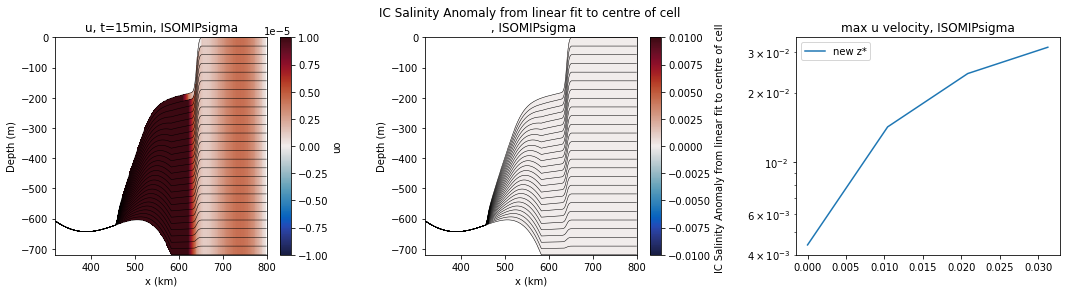

In [5]:
label = 'ISOMIPsigma'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
axes[0].set_title('u, t=15min, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4, prog.u.max(['xq','yh','zl']).values, label = 'new z*')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()



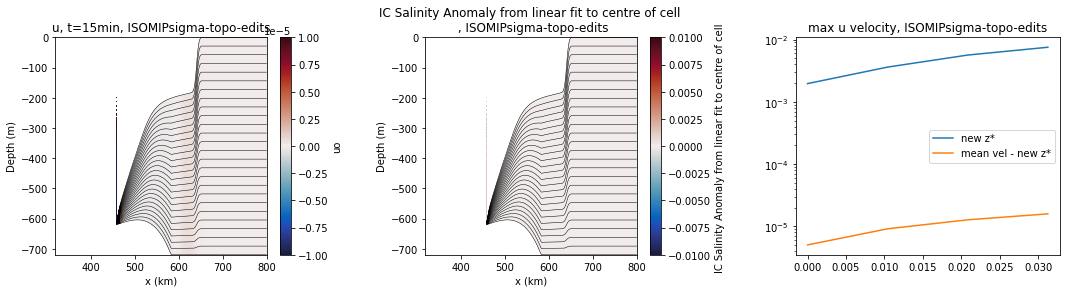

Text(0.5, 1.0, 'max ocean height')

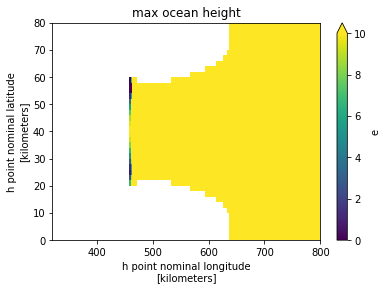

In [21]:
label = 'ISOMIPsigma-topo-edits'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
axes[0].set_title('u, t=15min, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4, np.abs(prog.u).max(['xq','yh','zl']).values, label = 'new z*')
axes[2].plot(np.arange(len(prog.Time))/24/4, np.abs(prog.u).mean(['xq','yh','zl']).values, label = 'mean vel - new z*')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

(prog.e.isel(Time = 0,zi = 0)-prog.e.isel(Time = 0,zi = -1)).plot(vmax = 10)
plt.title('max ocean height')


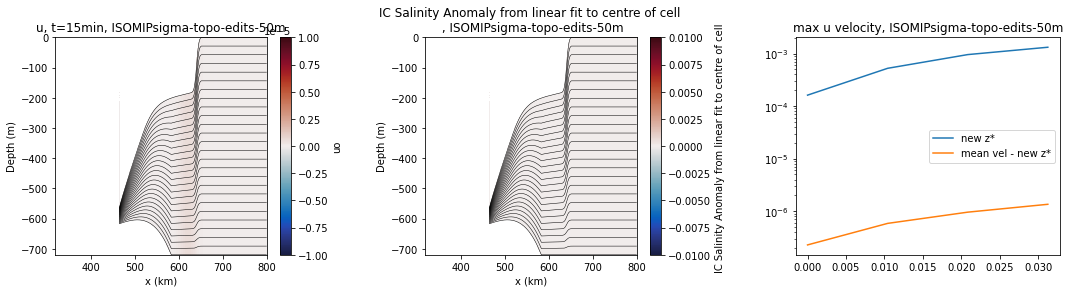

Text(0.5, 1.0, 'max ocean height')

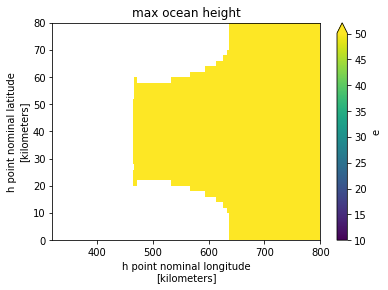

In [7]:
label = 'ISOMIPsigma-topo-edits-50m'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
axes[0].set_title('u, t=15min, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4, np.abs(prog.u).max(['xq','yh','zl']).values, label = 'new z*')
axes[2].plot(np.arange(len(prog.Time))/24/4, np.abs(prog.u).mean(['xq','yh','zl']).values, label = 'mean vel - new z*')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

(prog.e.isel(Time = 0,zi = 0)-prog.e.isel(Time = 0,zi = -1)).plot(vmax = 10)
plt.title('max ocean height')


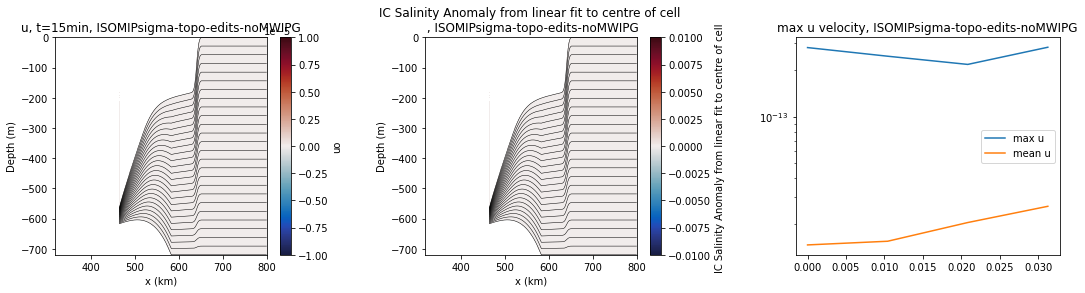

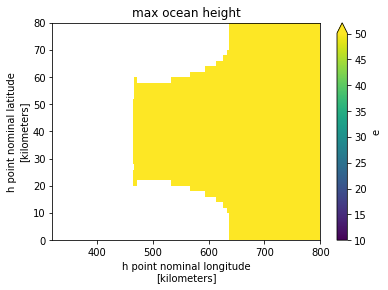

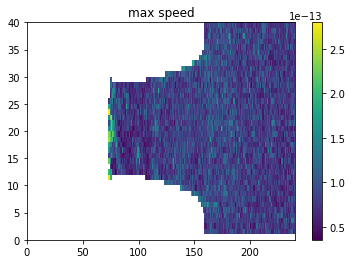

In [9]:
label = 'ISOMIPsigma-topo-edits-noMWIPG'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
axes[0].set_title('u, t=15min, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4, np.abs(prog.u).max(['xq','yh','zl']).values, label = 'max u ')
axes[2].plot(np.arange(len(prog.Time))/24/4, np.abs(prog.u).mean(['xq','yh','zl']).values, label = 'mean u')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

(prog.e.isel(Time = 0,zi = 0)-prog.e.isel(Time = 0,zi = -1)).plot(vmax = 10)
plt.title('max ocean height')
plt.show()


plt.pcolormesh(np.max((np.sqrt(prog.u.isel(Time = -1).values[:,:,:-1]**2+prog.v.isel(Time = -1).values[:,:-1,:]**2)),axis = 0))
plt.title('max speed')
plt.colorbar()
plt.show()



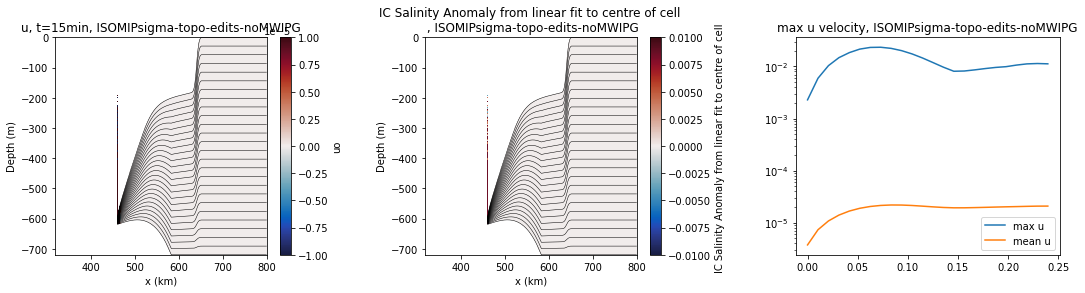

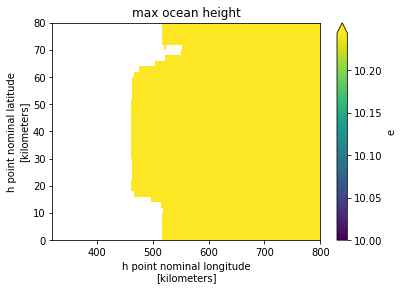

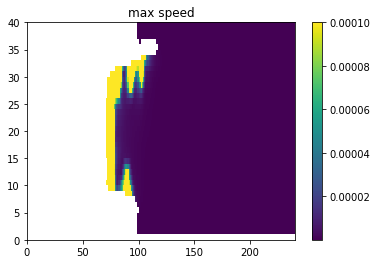

In [4]:
label = 'ISOMIPsigma-topo-edits-noMWIPG'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
axes[0].set_title('u, t=15min, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4, np.abs(prog.u).max(['xq','yh','zl']).values, label = 'max u ')
axes[2].plot(np.arange(len(prog.Time))/24/4, np.abs(prog.u).mean(['xq','yh','zl']).values, label = 'mean u')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

(prog.e.isel(Time = 0,zi = 0)-prog.e.isel(Time = 0,zi = -1)).plot(vmax = 10)
plt.title('max ocean height')
plt.show()


plt.pcolormesh(np.max((np.sqrt(prog.u.isel(Time = -1).values[:,:,:-1]**2+prog.v.isel(Time = -1).values[:,:-1,:]**2)),axis = 0),
              vmax = 1e-4)
plt.title('max speed')
plt.colorbar()
plt.show()



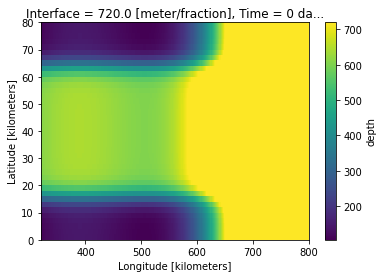

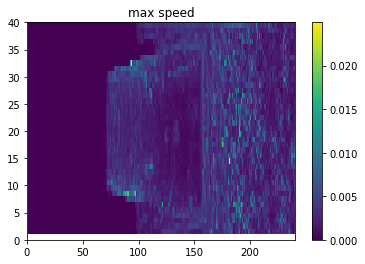

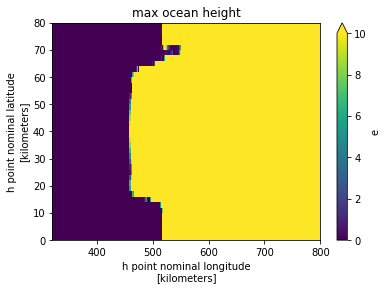

In [16]:
topo = xr.open_dataset('INPUT/ISOMIP-topo-file.nc')
topo.depth.plot()
plt.show()

prog = xr.open_dataset('../rho/prog.nc')

plt.pcolormesh(np.max((np.sqrt(prog.u.isel(Time = -1).values[:,:,:-1]**2+prog.v.isel(Time = -1).values[:,:-1,:]**2)),axis = 0))
plt.title('max speed')
plt.colorbar()
plt.show()

(prog.e.isel(Time = 0,zi = 0)-prog.e.isel(Time = 0,zi = -1)).plot(vmax = 10)
plt.title('max ocean height')
plt.show()



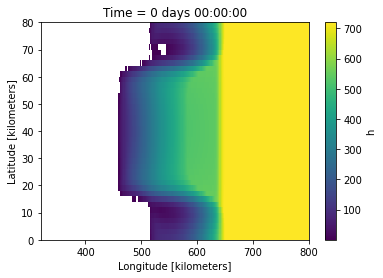

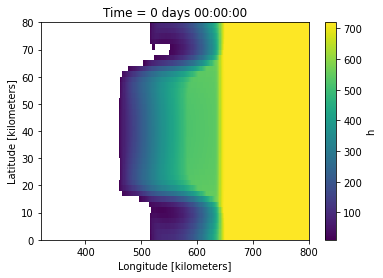

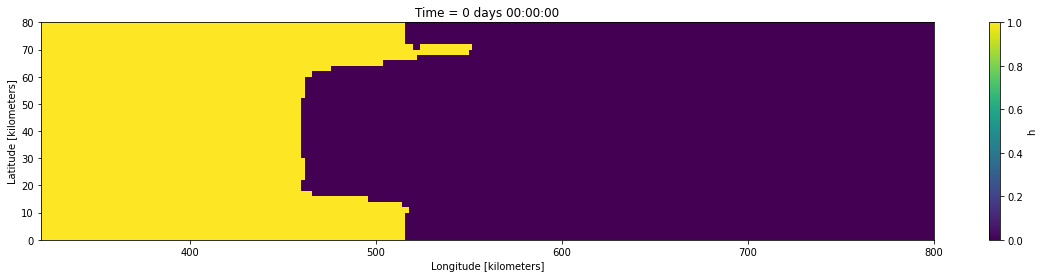

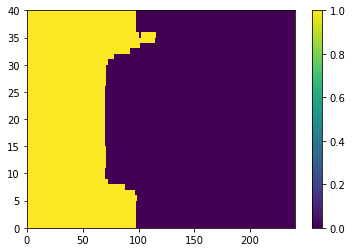

In [19]:
#Want to mask land when h small

#IC = xr.open_dataset('ISOMIP_IC.nc')
IC = xr.open_dataset('../rho/ISOMIP_IC.nc')

h = IC.h.sum('Layer').isel(Time = 0)
h.where(h>0.0000000001).plot()
#plt.xlim(450,480)
plt.show()
h.where(h>10).plot()
#plt.xlim(450,480)


mask = (h.where(h>10)*0-1).fillna(0)+1
#mask[29,69]=2
#mask[28,69:71]=2
# mask[8,69]=2
# mask[8,70]=2
# mask[28,70]=2
# mask[28,69]=2
# mask[29,69]=2
# mask[30,69:71]=2
# mask[31,69:75]=2
# mask[31,77]=2
# mask[32,90]=2
# mask[33,98]=2
# mask[34,97:100]=2
# mask[35,98]=2
# mask[34,108:112]=2
# mask[35,105:112]=2
# mask[36:38,97]=2
# mask[39,97]=2

#mask[:8,97]=2


fig = plt.figure(figsize = (20,4))
mask.plot()
plt.show()
mask = mask.values
mask[mask == 2] = 0
plt.pcolormesh(mask)
plt.colorbar()

In [20]:
### Make a topography edit file for use with TOPO_EDITS_FILE option
### Land mask input as numpy array ed, of dimension NX x NY, with
### elements 1 for land and 0 otherwise
def make_topo_edits(ed, filename):
    nx, ny = ed.shape
    
    iE, jE = np.asarray(ed==1).nonzero()
    new_topog = nc.Dataset(filename, "w", format="NETCDF4")
    new_topog.createDimension("nEdit", len(iE))
    
    new_topog.createVariable("ni","int")
    new_topog.createVariable("nj","int")
    new_topog.createVariable("iEdit","int",("nEdit"))
    new_topog.createVariable("jEdit","int",("nEdit"))
    new_topog.createVariable("zEdit","f8",("nEdit"))

    new_topog["ni"][:] = nx
    new_topog["nj"][:] = ny
    
    new_topog["zEdit"][:] = np.zeros(len(iE))
    
    new_topog["jEdit"][:] = jE
    new_topog["iEdit"][:] = iE
    
    new_topog.close()
mask = np.swapaxes(mask,0,1)
make_topo_edits(mask,'INPUT/Topo_edits_10m_less_drastic.nc')

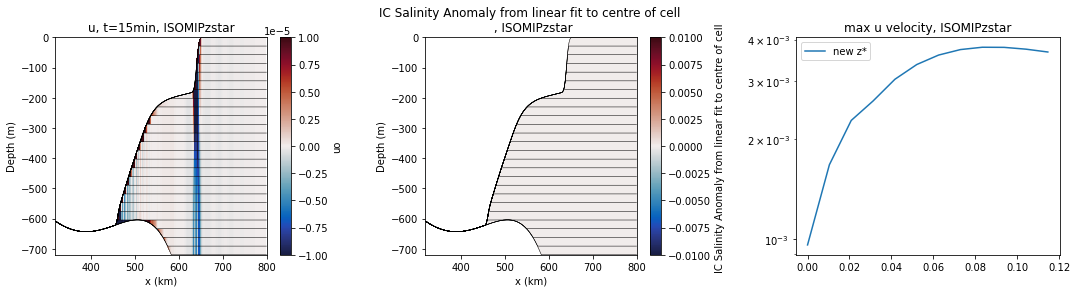

In [6]:
label = 'ISOMIPzstar'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)
axes[0].set_title('u, t=15min, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4, prog.u.max(['xq','yh','zl']).values, label = 'new z*')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()



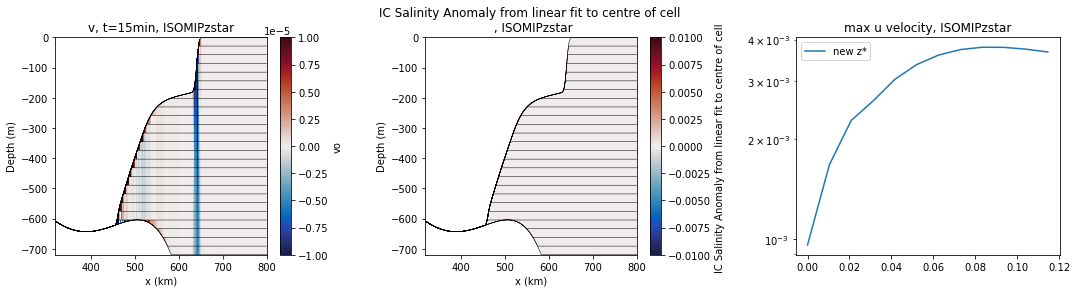

In [7]:
label = 'ISOMIPzstar'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.v,"vo",-1e-5,1e-5,cm.cm.balance,ymax)
axes[0].set_title('v, t=15min, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4, prog.u.max(['xq','yh','zl']).values, label = 'new z*')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()



In [18]:
np.max(np.abs(IC.Salt-ideal_salt)) #perfect initialisation

<xarray.DataArray ()>
array(1.42108547e-14)
Coordinates:
    Interface  float64 0.0

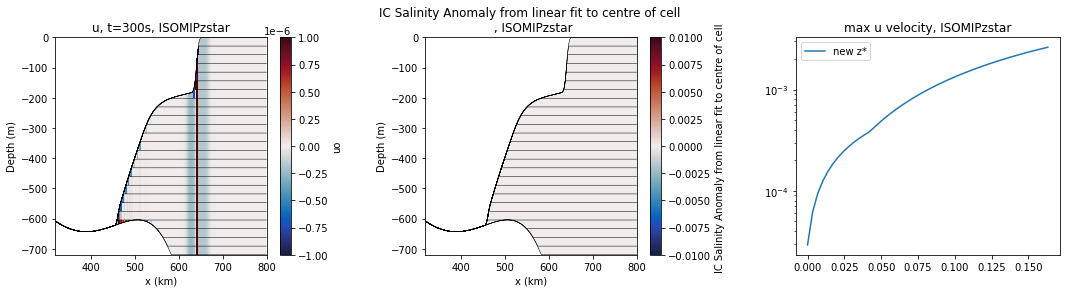

In [10]:
label = 'ISOMIPzstar'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-6,1e-6,cm.cm.balance,ymax)
axes[0].set_title('u, t=300s, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4/3, prog.u.max(['xq','yh','zl']).values, label = 'new z*')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()



In [13]:
(IC.Salt-ideal_salt).max()

<xarray.DataArray ()>
array(1.42108547e-14)
Coordinates:
    Interface  float64 0.0

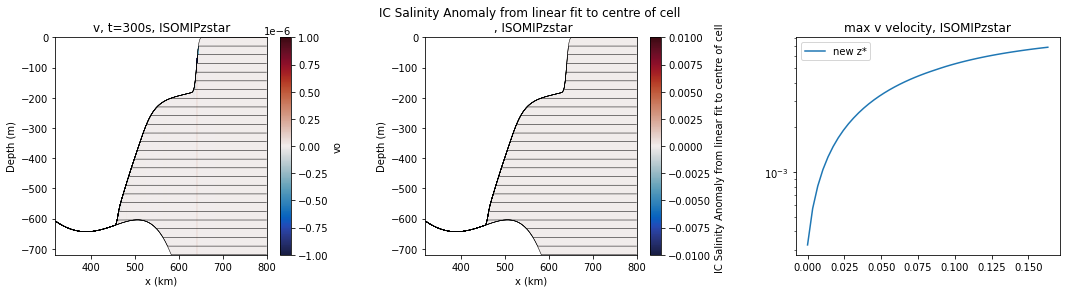

In [11]:
label = 'ISOMIPzstar'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.v,"vo",-1e-6,1e-6,cm.cm.balance,ymax)
axes[0].set_title('v, t=300s, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4/3, prog.v.max(['xh','yq','zl']).values, label = 'new z*')
axes[2].set_title('max v velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()



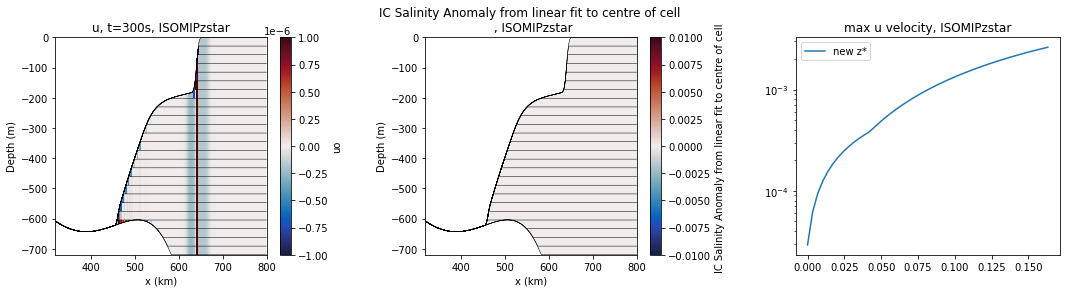

In [4]:
label = 'ISOMIPzstar'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-6,1e-6,cm.cm.balance,ymax)
axes[0].set_title('u, t=300s, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4/3, prog.u.max(['xq','yh','zl']).values, label = 'new z*')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()


with MWIPG (and y dxn implemented) as well as intxpa

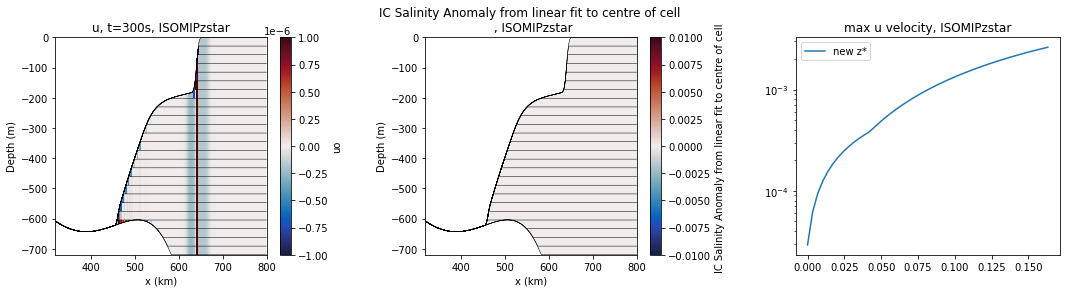

In [4]:
label = 'ISOMIPzstar'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u,"uo",-1e-6,1e-6,cm.cm.balance,ymax)
axes[0].set_title('u, t=300s, '+label)

ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-ymax) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24/4/3, prog.u.max(['xq','yh','zl']).values, label = 'new z*')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()


# plot

In [68]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_IC(label)
    depth = grid.interp(prog.e,"x").fillna(0)
    lon = ocean_static.geolonb
    dataplot = variable.fillna(0)

    xx = lon
    if (varname == "uo") or (varname == "PFu") or (varname == "visc_rem_u"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    if (varname == "uo"):
        plt.colorbar(cax, ax = ax, label = 'u (m/s)') #r'u $\times 10^{-4}$(m/s)')
    else:
        plt.colorbar(cax, ax = ax, label = varname)
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


In [69]:
def find_speed(prog):
    # interpolate speeds to the same grid
    uo_interp = grid.interp(prog.u,'x',boundary='extend')
    vo_interp = grid.interp(prog.u,'y',boundary='extend')
    horiz_speed = np.sqrt(uo_interp**2+vo_interp**2)
    return horiz_speed

In [70]:
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + 'archive/prog-'+label+'.nc')
    return prog


In [45]:
prog = open_files('zstar')
grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"}},periodic=False)

In [ ]:
#speed = find_speed(prog)

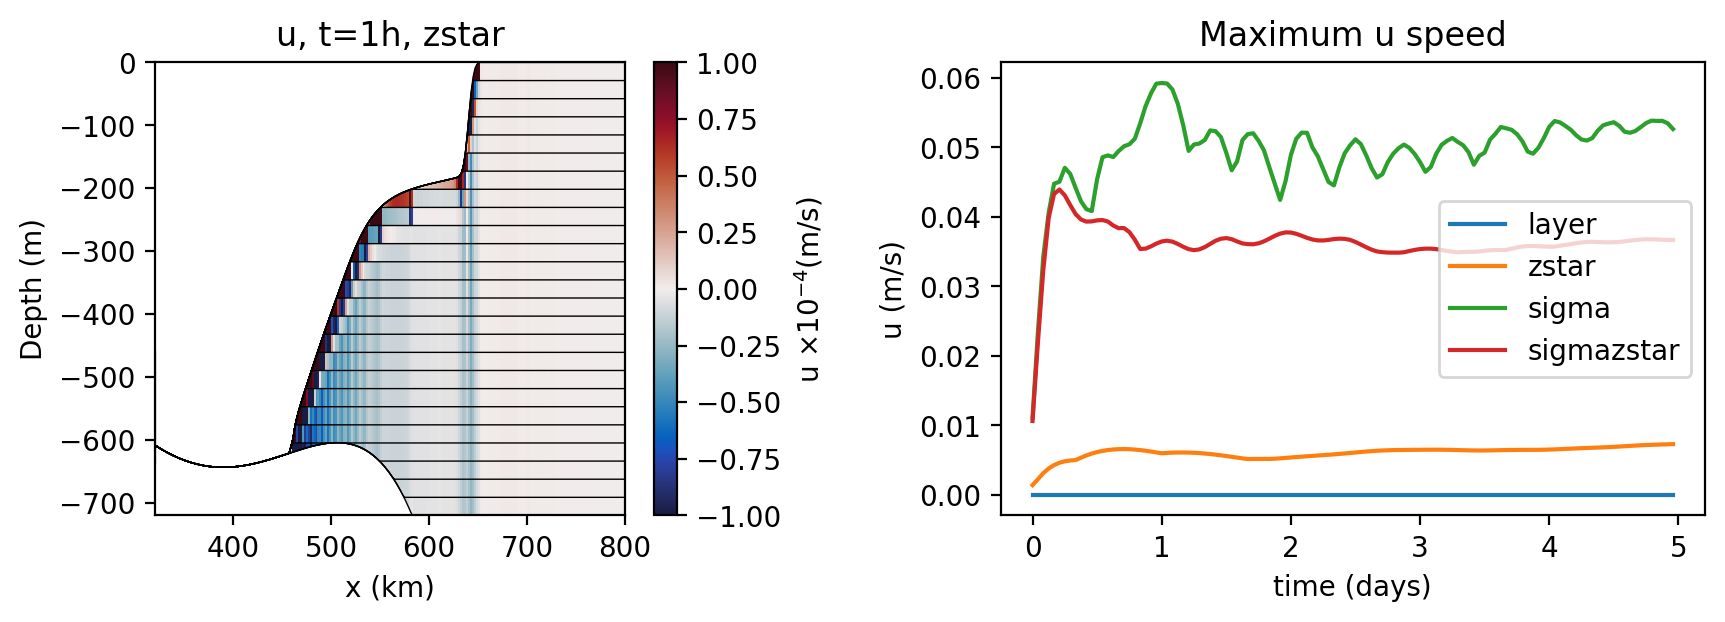

In [46]:

fig, axes = plt.subplots(ncols = 2, gridspec_kw={'width_ratios': [1, 1.2]}, figsize = (10,3),dpi = 200)

label = 'zstar'
prog = open_files(label)
x = 20
time = 0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.u*1e4,"uo",-1,1,cm.cm.balance,ymax)
axes[0].set_title('u, t=1h, '+label)


for label in ['layer','zstar','sigma','sigmazstar']:
    prog = open_files(label)
#     grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
#                              "y":{"center":"yh","outer":"yq"}},periodic=False)
#     speed = find_speed(prog)
    axes[1].plot(np.arange(len(prog.Time))/24, np.abs(prog.u).max(['xq','yh','zl']).values, label = label)
axes[1].set_title('Maximum u speed')

axes[1].legend()
#axes[1].set_yscale('log')
axes[1].set_xlabel('time (days)')
axes[1].set_ylabel('u (m/s)')

fig.subplots_adjust(wspace = 0.4)
plt.show()


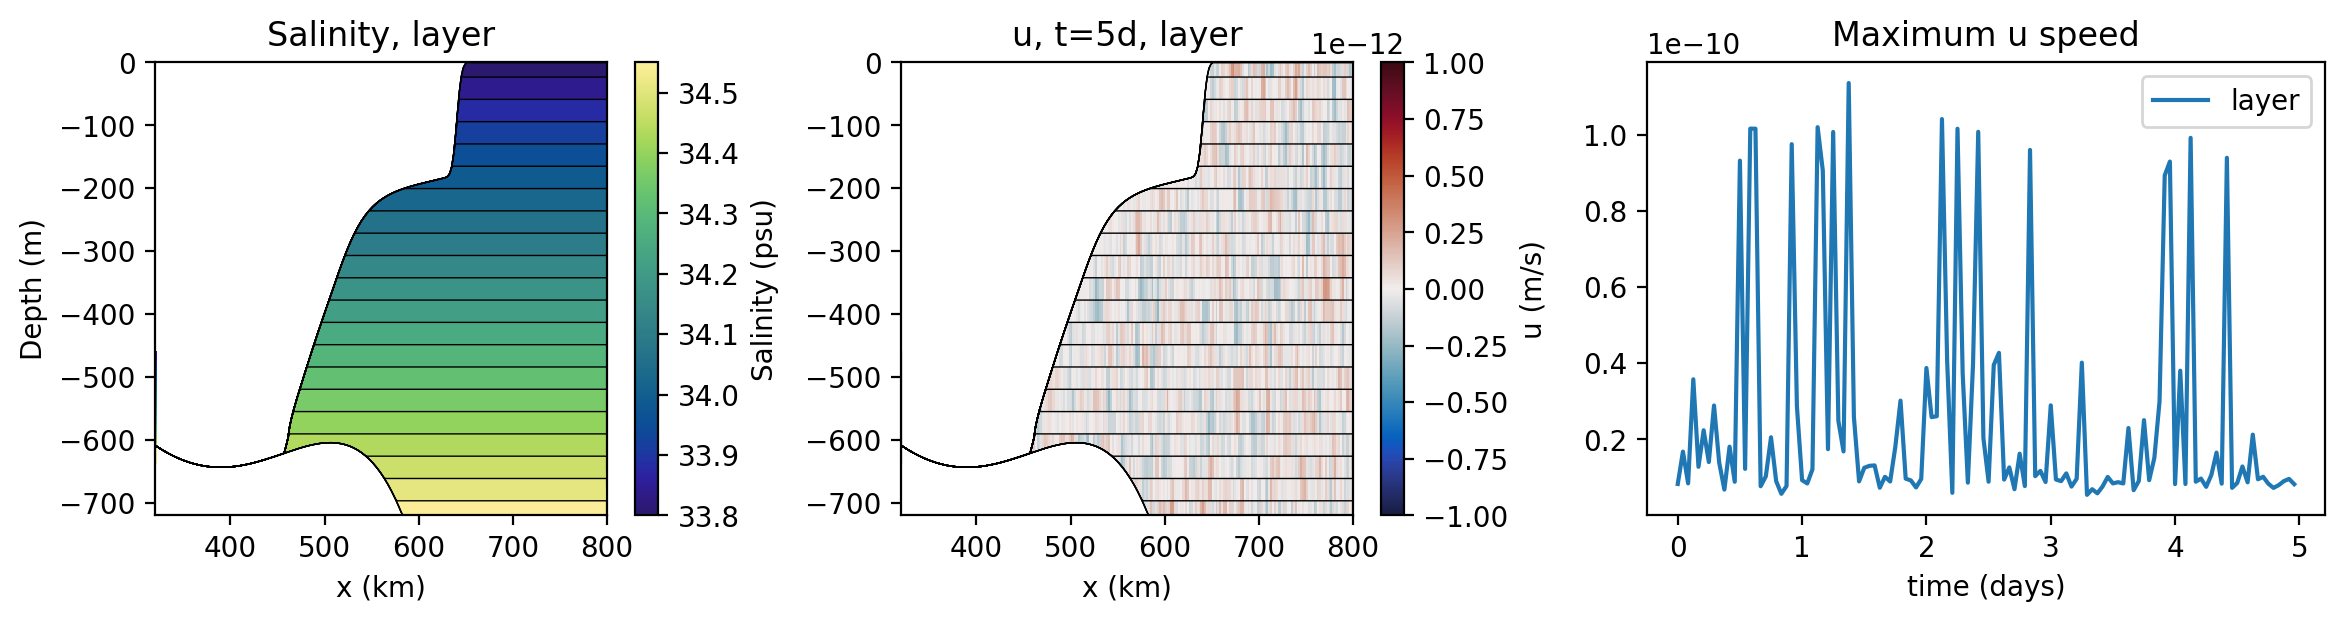

In [33]:
fig, axes = plt.subplots(ncols = 3, gridspec_kw={'width_ratios': [1,1, 1.2]}, figsize = (14,3),dpi = 200)

label = 'layer'
prog = open_files(label)
x = 20
time = -1#0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[0].set_title('Salinity, '+label)
plot(axes[1],x,time,0,prog.u,"uo",-1e-12,1e-12,cm.cm.balance,ymax)
axes[1].set_title('u, t=5d, '+label)
axes[1].set_ylabel('')


for label in ['layer']:
    prog = open_files(label)
#     grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
#                              "y":{"center":"yh","outer":"yq"}},periodic=False)
#     speed = find_speed(prog)
    axes[2].plot(np.arange(len(prog.Time))/24, np.abs(prog.u).max(['xq','yh','zl']).values, label = label)
axes[2].set_title('Maximum u speed')

axes[2].legend()
#axes[1].set_yscale('log')
axes[2].set_xlabel('time (days)')
fig.subplots_adjust(wspace = 0.3)
plt.show()


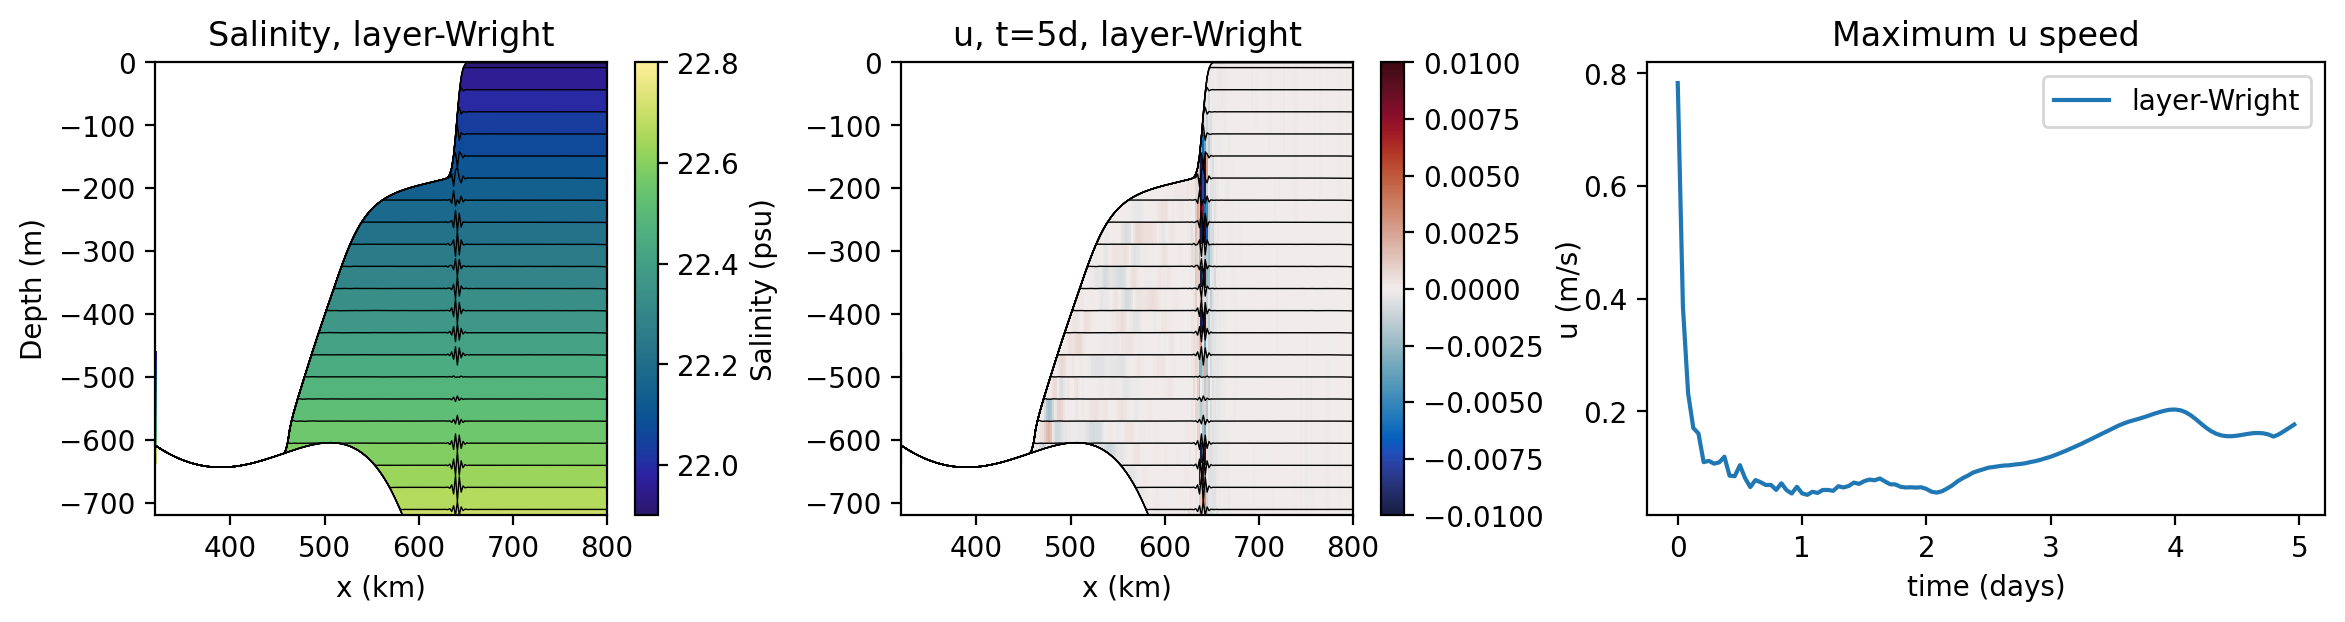

In [56]:
fig, axes = plt.subplots(ncols = 3, gridspec_kw={'width_ratios': [1,1, 1.2]}, figsize = (14,3),dpi = 200)

label = 'layer-Wright'
prog = open_files(label)
x = 20
time = -1#0#0#24*5-1
ymax = 720
plot(axes[0],x,time,0,prog.salt,"Salinity (psu)",21.9,22.8,cm.cm.haline,ymax)
axes[0].set_title('Salinity, '+label)
plot(axes[1],x,time,0,prog.u,"uo",-1e-2,1e-2,cm.cm.balance,ymax)
axes[1].set_title('u, t=5d, '+label)
axes[1].set_ylabel('')


for label in ['layer-Wright']:
    prog = open_files(label)
#     grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
#                              "y":{"center":"yh","outer":"yq"}},periodic=False)
#     speed = find_speed(prog)
    axes[2].plot(np.arange(len(prog.Time))/24, np.abs(prog.u).max(['xq','yh','zl']).values, label = label)
axes[2].set_title('Maximum u speed')

axes[2].legend()
#axes[1].set_yscale('log')
axes[2].set_xlabel('time (days)')
fig.subplots_adjust(wspace = 0.3)
plt.show()


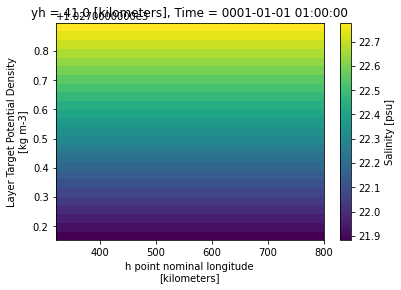

In [53]:
prog.salt.isel(Time = 0,yh = 20).plot()

In [79]:
basee = 'archive'
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + '/prog-'+label+'.nc')
    return prog


Text(0.5, 1.0, 'ISOMIP+ ALE coordinates (fixed initialisation and INTXPA correction)')

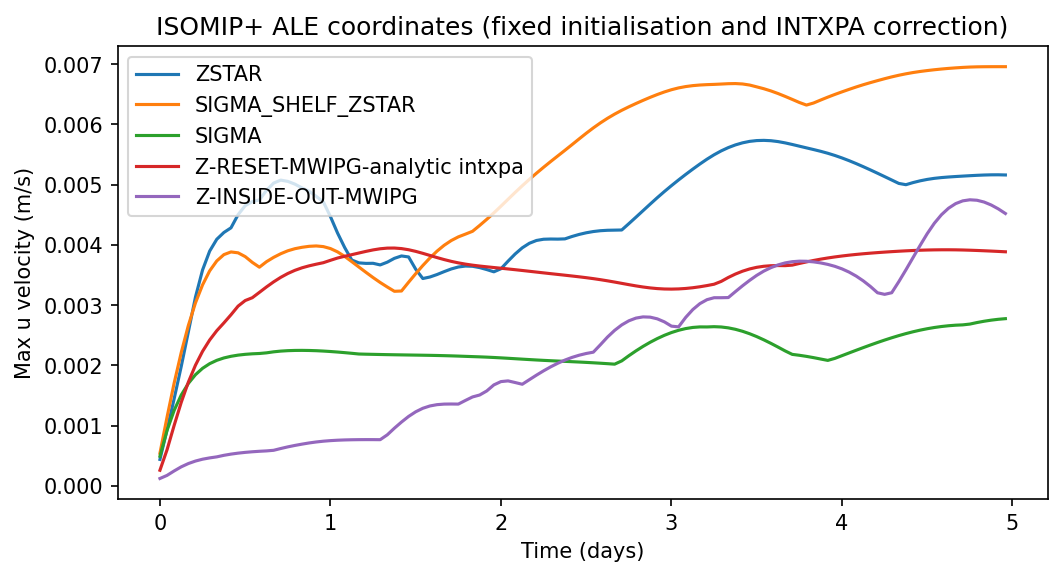

In [80]:
fig, axes = plt.subplots(ncols = 1, figsize = (8,4),dpi = 150)
label = 'zstar-intxpa5pt'
prog = open_files(label)
axes.plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'ZSTAR')
axes.set_title('max u velocity, '+label)

prog2 = open_files('sigmazstar-intxpa5pt')
axes.plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'SIGMA_SHELF_ZSTAR')
prog2 = open_files('sigma-hack-intxpa5pt')
axes.plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'SIGMA')

prog2 = open_files('reset-mwipg')
axes.plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'Z-RESET-MWIPG-analytic intxpa')

prog2 = open_files('zstar-insideout-mwipg')
axes.plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'Z-INSIDE-OUT-MWIPG')

axes.legend()
#axes.set_yscale('log')
#axes.set_ylim(1e-14,1e-1)
axes.set_ylabel('Max u velocity (m/s)')
axes.set_xlabel('Time (days)')
axes.set_title('ISOMIP+ ALE coordinates (fixed initialisation and INTXPA correction)')
